In [22]:
import pandas
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
breast = load_breast_cancer()

x = DataFrame(breast["data"], columns=breast["feature_names"])
y = pandas.DataFrame(breast["target"], columns=["label"])

dataset = x.join(y)
dataset.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
93,13.45,18.30,86.60,555.1,0.10220,0.08165,0.039740,0.027800,0.1638,0.05710,...,25.94,97.59,699.4,0.1339,0.17510,0.13810,0.07911,0.2678,0.06603,1
145,11.90,14.65,78.11,432.8,0.11520,0.12960,0.037100,0.030030,0.1995,0.07839,...,16.51,86.26,509.6,0.1424,0.25170,0.09420,0.06042,0.2727,0.10360,1
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.023430,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242,1
484,15.73,11.28,102.80,747.2,0.10430,0.12990,0.119100,0.062110,0.1784,0.06259,...,14.20,112.50,854.3,0.1541,0.29790,0.40040,0.14520,0.2557,0.08181,1
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.1026,0.31710,0.36620,0.11050,0.2258,0.08004,1
119,17.95,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.2129,0.05025,...,27.83,129.20,1261.0,0.1072,0.12020,0.22490,0.11850,0.4882,0.06111,0
315,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174,1
216,11.89,18.35,77.32,432.2,0.09363,0.11540,0.066360,0.031420,0.1967,0.06314,...,27.10,86.20,531.2,0.1405,0.30460,0.28060,0.11380,0.3397,0.08365,1
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.109700,0.1966,0.07069,...,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100,0
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.097690,0.066380,0.1798,0.05391,...,24.56,128.80,1223.0,0.1500,0.20450,0.28290,0.15200,0.2650,0.06387,0


In [24]:
dataset.shape

(569, 31)

In [25]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset.drop(columns=["label"]))

In [26]:
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(scaled_dataset)
pca_dataset = DataFrame(pca_dataset)

pca_dataset

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [27]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

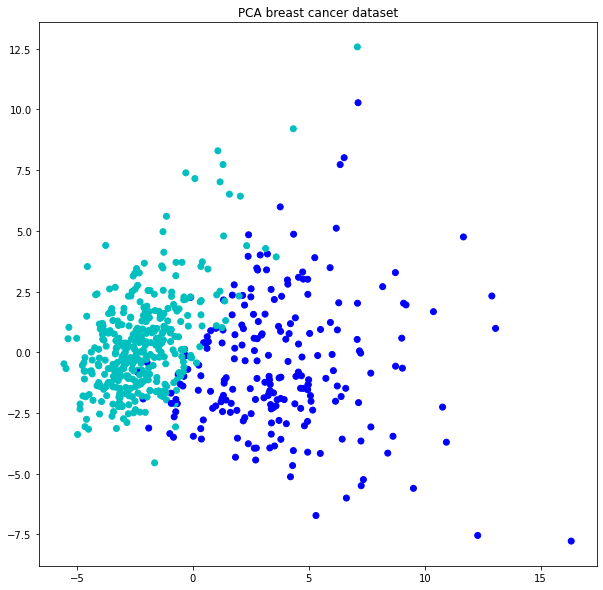

In [37]:
pyplot.figure(figsize=(10, 10))
pyplot.title("PCA breast cancer dataset")

label_colors = dataset["label"].map({0: "b", 1: "c"})

pyplot.scatter(pca_dataset[0], pca_dataset[1], c=label_colors)
pyplot.show()